In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle

import tensorflow as tf
# from tensorflow.keras import datasets as K_datasets
# from tensorflow.keras import models as K_models
# from tensorflow.keras import layers as K_layers
# from tensorflow.keras import utils as K_utils
# from tensorflow.keras import optimizers as K_optimizers
# from tensorflow.keras import backend as K_backend

# Inputs to eager execution function cannot be Keras symbolic tensors
from keras import datasets as K_datasets
from keras import models as K_models
from keras import layers as K_layers
from keras import utils as K_utils
from keras import optimizers as K_optimizers
from keras import backend as K_backend

Using TensorFlow backend.


In [2]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = K_datasets.mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.astype('float32') / 255.
    x_test = x_test.reshape(x_test.shape + (1,))

    return (x_train, y_train), (x_test, y_test)
(X_train, y_train), (X_test, y_test) = load_mnist()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [3]:
from Autoencoder import Autoencoder
vae = Autoencoder(
        input_dim=[28, 28, 1],
        encoder_conv_settings=[
            [32, 3, 1],
            [64, 3, 2],
            [64, 3, 2],
            [64, 3, 1],
        ],
        decoder_conv_settings=[
            [64, 3, 1],
            [64, 3, 2],
            [32, 3, 2],
            [1, 3, 1],
        ],
        z_dim=3, 
    is_variational=True
    )
vae.compile(0.0005, 1000)

In [4]:
vae.train(X_train, batch_size=128, epochs=200, run_folder='tmp')

Epoch 1/200
 4736/60000 [=>............................] - ETA: 2:55 - loss: 155.5560 - __r_loss: 0.1510 - __kl_loss: 4.5845

KeyboardInterrupt: 

In [8]:
model = vae

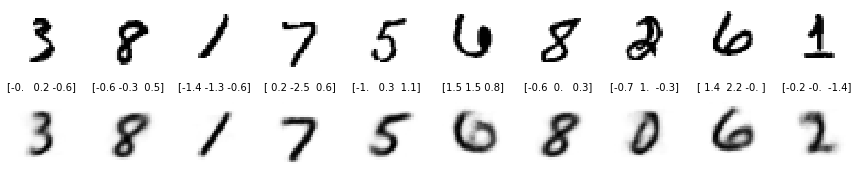

In [24]:
# pick some images from test set, and have a peek

n_to_show = 10
example_idx = np.random.choice(range(len(X_test)), n_to_show)
example_images = X_test[example_idx]

z_points = model.encoder.predict(example_images)

new_images = model.decoder.predict(z_points)

# can i use AE.model.predict() ?
# new_images = model.model.predict(example_images)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            str(np.round(z_points[i], 1)),
            fontsize=10,
            ha='center',
            transform=ax.transAxes
           )
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = new_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


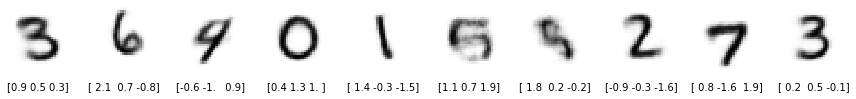

In [13]:
# randomly pick some images 
test_points = np.random.normal(0, 1, z_points.shape)
new_images = model.decoder.predict(test_points)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = new_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            str(np.round(test_points[i], 1)),
            fontsize=10,
            ha='center',
            transform=ax.transAxes
           )
    ax.imshow(img, cmap='gray_r')